<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/ZamanSerisiTahmini_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amaç: Zaman serisi verilerini kullanarak gelecekteki değerleri tahmin etme.
•	Veri Seti: Hisse senedi fiyatları veya hava durumu verisi.
•	Adımlar:
1.	Veriyi yükle ve ön işleme yap.
2.	LSTM veya GRU gibi RNN modelleri kullan.
3.	Modeli eğit ve tahminler yap.
4.	Tahminleri gerçek değerlerle karşılaştır.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

 Veriyi Yükleme ve Ön İşleme
Örnek olarak hisse senedi fiyatları verisini kullanacağız. Veriyi yükleyip ön işleme adımlarını gerçekleştirelim

In [3]:
# Örnek veri setini yükleme (örneğin, bir CSV dosyası)
# Burada 'your_dataset.csv' yerine kendi veri setinizin yolunu verin.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, usecols=[1], engine='python')

# Veriyi numpy array'e dönüştürme
dataset = data.values
dataset = dataset.astype('float32')

# Veriyi normalize etme (0 ile 1 arasında)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Veriyi eğitim ve test setlerine ayırma
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

 Veriyi LSTM için Hazırlama
LSTM modeli için veriyi uygun formata getirelim.

In [4]:
# Veriyi zaman serisi formatına dönüştürme fonksiyonu
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Zaman serisi verisini oluşturma
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# LSTM için veriyi yeniden şekillendirme [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

LSTM Modelini Oluşturma ve Eğitme
LSTM modelini oluşturup eğitelim.

In [5]:
# LSTM modelini oluşturma
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 23ms/step - loss: 0.0483
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0225
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0166
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0150
Epoch 5/100
94/94 - 0s - 3ms/step - loss: 0.0137
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0127
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0114
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0102
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0091
Epoch 10/100
94/94 - 0s - 3ms/step - loss: 0.0081
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0072
Epoch 12/100
94/94 - 0s - 3ms/step - loss: 0.0064
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0054
Epoch 14/100
94/94 - 0s - 3ms/step - loss: 0.0048
Epoch 15/100
94/94 - 0s - 3ms/step - loss: 0.0042
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0036
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0032
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0029
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0027
Epoch 20/100
94/94 - 0s - 3ms/step - loss: 0.0024
Epoch 21/100
94/94 -

 Tahminler Yapma ve Modeli Değerlendirme
Modeli kullanarak tahminler yapalım ve gerçek değerlerle karşılaştıralım.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Train Score: 23.57 RMSE
Test Score: 47.74 RMSE


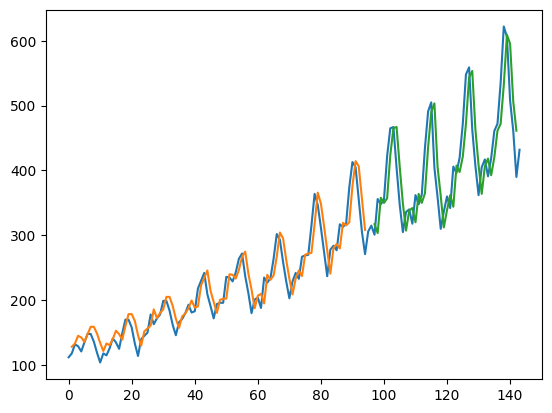

In [6]:
# Tahminler yapma
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Tahminleri tersine normalize etme
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# RMSE (Root Mean Squared Error) hesaplama
import math
from sklearn.metrics import mean_squared_error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Tahminleri görselleştirme
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

 Sonuçları Değerlendirme
Yukarıdaki kodları çalıştırdıktan sonra, modelin eğitim ve test verileri üzerindeki performansını RMSE (Root Mean Squared Error) ile değerlendirebilir ve tahminleri görselleştirebilirsiniz.

In [7]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]  # look_back kadar geriye bak
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])  # Bir sonraki değer
    return np.array(dataX), np.array(dataY)

 trainX ve trainY Boyutlarını Kontrol Etme
create_dataset fonksiyonunu çağırdıktan sonra, trainX ve trainY'nin boyutlarını kontrol edin:

In [8]:
look_back = 1  # Örnek olarak look_back = 1 kullanalım
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print("trainX shape:", trainX.shape)
print("trainY shape:", trainY.shape)
print("testX shape:", testX.shape)
print("testY shape:", testY.shape)

trainX shape: (95, 1)
trainY shape: (95,)
testX shape: (47, 1)
testY shape: (47,)


 LSTM için Veriyi Yeniden Şekillendirme
LSTM modeli, girdi verisini (samples, time_steps, features) formatında bekler. Bu nedenle, trainX ve testX'i yeniden şekillendirmelisiniz:

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print("Reshaped trainX shape:", trainX.shape)
print("Reshaped testX shape:", testX.shape)

Reshaped trainX shape: (95, 1, 1)
Reshaped testX shape: (47, 1, 1)


Modeli Eğitme
Artık veri hazır olduğuna göre, modeli eğitebilirsiniz:

In [10]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 - 2s - 19ms/step - loss: 0.0577
Epoch 2/200
95/95 - 0s - 3ms/step - loss: 0.0291
Epoch 3/200
95/95 - 0s - 3ms/step - loss: 0.0204
Epoch 4/200
95/95 - 0s - 3ms/step - loss: 0.0182
Epoch 5/200
95/95 - 0s - 3ms/step - loss: 0.0172
Epoch 6/200
95/95 - 0s - 3ms/step - loss: 0.0162
Epoch 7/200
95/95 - 0s - 3ms/step - loss: 0.0152
Epoch 8/200
95/95 - 0s - 4ms/step - loss: 0.0142
Epoch 9/200
95/95 - 0s - 3ms/step - loss: 0.0132
Epoch 10/200
95/95 - 0s - 2ms/step - loss: 0.0121
Epoch 11/200
95/95 - 0s - 2ms/step - loss: 0.0113
Epoch 12/200
95/95 - 0s - 3ms/step - loss: 0.0101
Epoch 13/200
95/95 - 0s - 3ms/step - loss: 0.0092
Epoch 14/200
95/95 - 0s - 3ms/step - loss: 0.0082
Epoch 15/200
95/95 - 0s - 3ms/step - loss: 0.0073
Epoch 16/200
95/95 - 0s - 3ms/step - loss: 0.0064
Epoch 17/200
95/95 - 0s - 3ms/step - loss: 0.0056
Epoch 18/200
95/95 - 0s - 2ms/step - loss: 0.0048
Epoch 19/200
95/95 - 0s - 3ms/step - loss: 0.0042
Epoch 20/200
95/95 - 0s - 3ms/step - loss: 0.0037
Epoch 21/200
95/95 -

Modelin Performansını Değerlendirme
a) Tahminleri Yapma
Modeli kullanarak hem eğitim hem de test verisi üzerinde tahminler yapın:

In [11]:
# Eğitim ve test verisi üzerinde tahmin yapma
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Tahminleri tersine normalize etme (orijinal ölçeğe dönme)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


b) RMSE (Root Mean Squared Error) Hesaplama
Tahminlerin ne kadar doğru olduğunu ölçmek için RMSE değerini hesaplayın:

In [12]:
from sklearn.metrics import mean_squared_error
import math

# Eğitim verisi için RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print(f'Eğitim RMSE: {trainScore:.2f}')

# Test verisi için RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(f'Test RMSE: {testScore:.2f}')

Eğitim RMSE: 22.81
Test RMSE: 52.12


c) Tahminleri Görselleştirme
Tahminleri gerçek değerlerle karşılaştırmak için grafik çizelim:

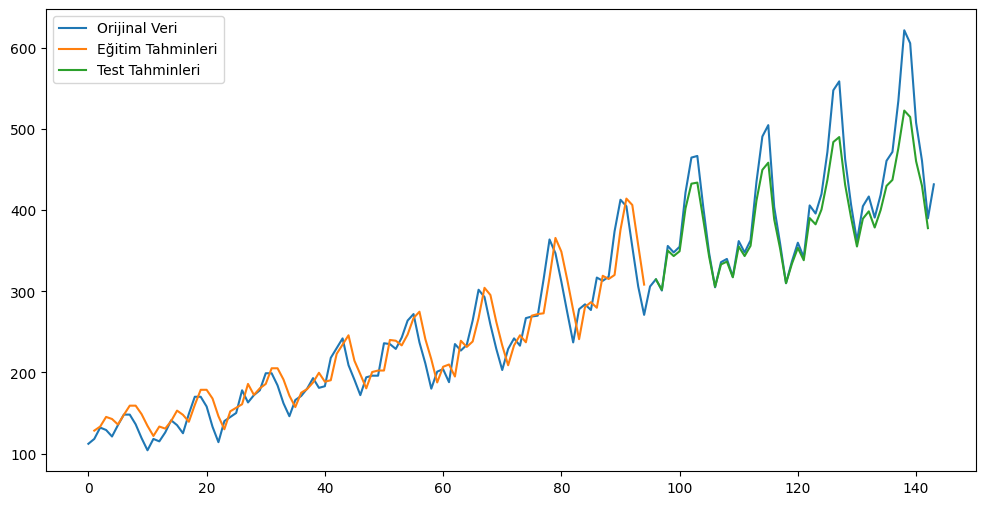

In [13]:
# testPredictPlot dizisini oluşturma
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan

# testPredict dizisini doğru aralığa yerleştirme
testPredictPlot[len(trainPredict) + look_back:len(trainPredict) + look_back + len(testPredict), :] = testPredict


# Orijinal veri ve tahminleri çizdirme
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(dataset), label='Orijinal Veri')
plt.plot(trainPredictPlot, label='Eğitim Tahminleri')
plt.plot(testPredictPlot, label='Test Tahminleri')
plt.legend()
plt.show()

a) Son Tahmini Kullanarak Geleceği Tahmin Etme

In [14]:
# Son look_back değerini al
last_sequence = testX[-1]  # Test verisinin son look_back değeri

# Gelecekteki değerleri tahmin etme
future_predictions = []
for _ in range(10):  # Örneğin, 10 adım ileriyi tahmin et
    next_prediction = model.predict(last_sequence.reshape(1, 1, look_back))
    future_predictions.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction)  # Yeni tahmini ekle

# Tahminleri tersine normalize etme
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Gelecekteki Tahminler:", future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Gelecekteki Tahminler: [[377.97342]
 [368.38733]
 [360.58832]
 [354.1404 ]
 [348.74057]
 [344.17087]
 [340.27014]
 [336.9165 ]
 [334.0156 ]
 [331.49332]]


b) Gelecekteki Tahminleri Görselleştirme
Gelecekteki tahminleri grafik üzerinde gösterebilirsiniz

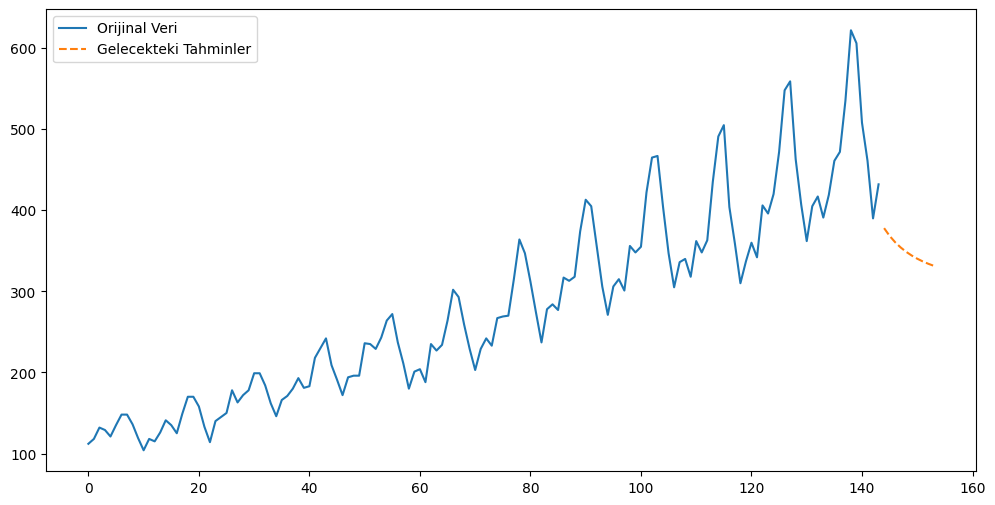

In [15]:
# Orijinal veri ve gelecekteki tahminleri çizdirme
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(dataset), label='Orijinal Veri')
plt.plot(range(len(dataset), len(dataset) + len(future_predictions)), future_predictions, label='Gelecekteki Tahminler', linestyle='--')
plt.legend()
plt.show()

 Modeli Kaydetme ve Yeniden Kullanma
Eğer modelin performansından memnunsanız, modeli kaydedip daha sonra yeniden kullanabilirsiniz.
Modeli Kaydetme

In [18]:
model.save('zaman_serisi_modeli.keras')

 Modeli Yükleme


In [19]:
from tensorflow.keras.models import load_model
loaded_model = load_model('zaman_serisi_modeli.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
